Simple Linear Regression

Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

Creating Dataset

In [40]:
from random import choice

exp = []
sal = []

for i in range(15,80):
    exp.append(i + choice([1.6,1.2,-1.6,-1.7]))
    sal.append(36*i + 12.5 + choice([1.3,-1.2,1.1,-0.8]))      
    
df = pd.DataFrame(list(zip(exp,sal)), columns = "Experience Salary".split())


In [41]:
df

,Experience,Salary
0,16.2,551.3
1,17.6,589.8
2,15.3,625.6
3,19.2,659.7
4,20.2,697.8
...,...,...
60,73.4,2713.6
61,74.4,2747.7
62,75.4,2783.3
63,79.2,2819.7


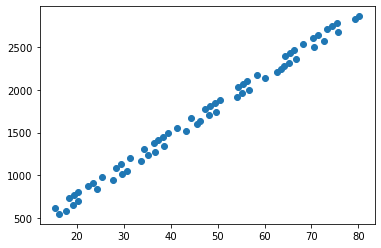

In [42]:
df.to_csv('expVsSal.csv', index = False)
plt.scatter(exp,sal)

Importing the dataset

In [43]:
dataset = pd.read_csv("expVsSal.csv")

x = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

Splitting the dataset into the Training set and Test set

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 0)
print(x_test)
print(y_test)

    Experience
45        58.3
29        45.6
43        56.3
62        75.4
34        47.3
33        49.6
31        44.4
40        56.6
26        39.4
63        79.2
22        38.6
2         15.3
11        27.6
28        41.3
54        70.6
4         20.2
10        23.4
35        48.3
52        65.4
46        62.6
45    2173.8
29    1595.7
43    2099.3
62    2783.3
34    1777.8
33    1739.7
31    1667.7
40    1991.3
26    1489.8
63    2819.7
22    1343.3
2      625.6
11     949.6
28    1559.3
54    2495.3
4      697.8
10     911.7
35    1813.6
52    2423.3
46    2209.6
Name: Salary, dtype: float64


Training the Simple Linear Regression model

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
obj = LinearRegression()
obj.fit(x_train, y_train)

LinearRegression()

Predicting the Test set results

In [48]:
y_pred = obj.predict(x_test)
y_pred

array([2116.47414976, 1660.83959059, 2044.72067587, 2729.96635147,
       1721.83004339, 1804.34653836, 1617.78750626, 2055.48369695,
       1438.40382154, 2866.29795185, 1409.70243199,  573.77446123,
       1015.05832562, 1506.56962174, 2557.75801415,  749.57047225,
        864.37603047, 1757.70678033, 2371.19898205, 2270.74411861])

In [49]:
x_test

,Experience
45,58.3
29,45.6
43,56.3
62,75.4
34,47.3
33,49.6
31,44.4
40,56.6
26,39.4
63,79.2


In [50]:
y_test

45    2173.8
29    1595.7
43    2099.3
62    2783.3
34    1777.8
33    1739.7
31    1667.7
40    1991.3
26    1489.8
63    2819.7
22    1343.3
2      625.6
11     949.6
28    1559.3
54    2495.3
4      697.8
10     911.7
35    1813.6
52    2423.3
46    2209.6
Name: Salary, dtype: float64

Visualising the Training set results

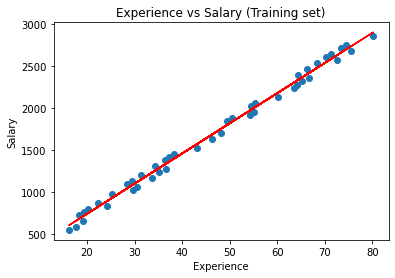

In [51]:
plt.scatter(x_train, y_train)
plt.plot(x_train, obj.predict(x_train), color = 'red')
plt.title('Experience vs Salary (Training set)')
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.show()

Getting the final linear regression equation with the values of the coefficients

In [52]:
print(obj.coef_)
print(obj.intercept_)

[35.87673694]
24.860386012181834


In [53]:
# Prediction of salary of a person of exp 12
obj.predict([[12]])

array([455.38122932])

In [54]:
obj.predict([[80]])

array([2894.99934141])

In [55]:
obj.predict([[14],[56],[20],[100]])

array([ 527.13470321, 2033.95765479,  742.39512486, 3612.53408026])

In [56]:
# Measuring accuracy

from sklearn.metrics import mean_absolute_error

In [59]:
mean_absolute_error(y_test, y_pred)
# Answer that shows up is the 'Mean absolute error regression loss'; 
# Lesser the loss, more the accuracy

56.50963581354332

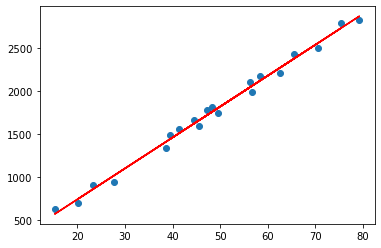

In [58]:
plt.scatter(x_test, y_test)
plt.plot(x_test, obj.predict(x_test), color = 'red')